In [1]:
# Importar la biblioteca seaborn para visualización estadística
import seaborn as sns

# Importar la biblioteca matplotlib.pyplot para crear gráficos
import matplotlib.pyplot as plt

# Importar la biblioteca pandas para el análisis de datos
import pandas as pd

In [2]:
# Importar la biblioteca google.colab y montar Google Drive en Google Colab
from google.colab import drive

# Montar Google Drive en la ruta '/content/drive'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Leer un archivo CSV desde Google Drive y asignarlo a un DataFrame llamado 'df'
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto melbourne_housing-clean.csv', index_col=0)

# Mostrar las primeras filas del DataFrame 'df'
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


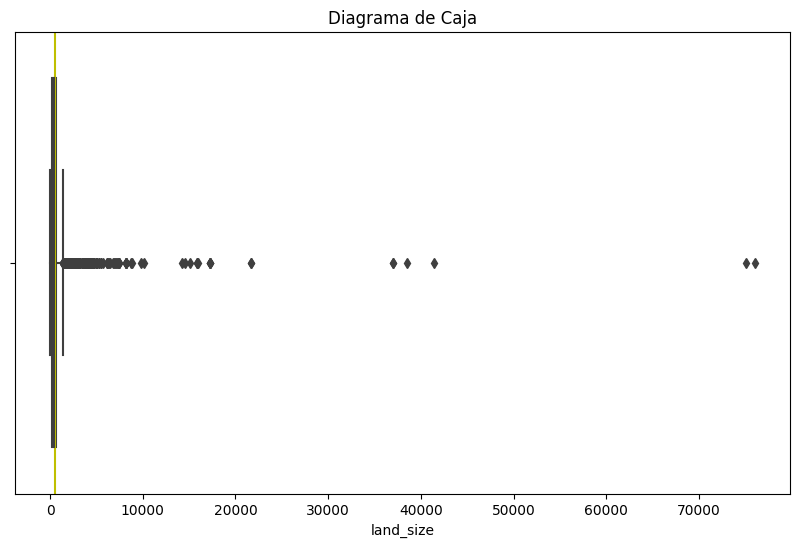

In [4]:
# Crear un diagrama de caja (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['land_size'])
plt.title("Diagrama de Caja")
plt.axvline(df['land_size'].mean(), c='y')  # Línea vertical en la media
plt.show()

Estadísticas Antes de Eliminar Valores Atípicos:
 count    11646.000000
mean       554.458097
std       1460.432326
min          0.000000
25%        162.000000
50%        412.000000
75%        656.000000
max      76000.000000
Name: land_size, dtype: float64

Estadísticas Después de Eliminar Valores Atípicos:
 count    10934.000000
mean       393.322115
std        290.902164
min          0.000000
25%        151.000000
50%        368.000000
75%        622.000000
max       1396.000000
Name: land_size, dtype: float64


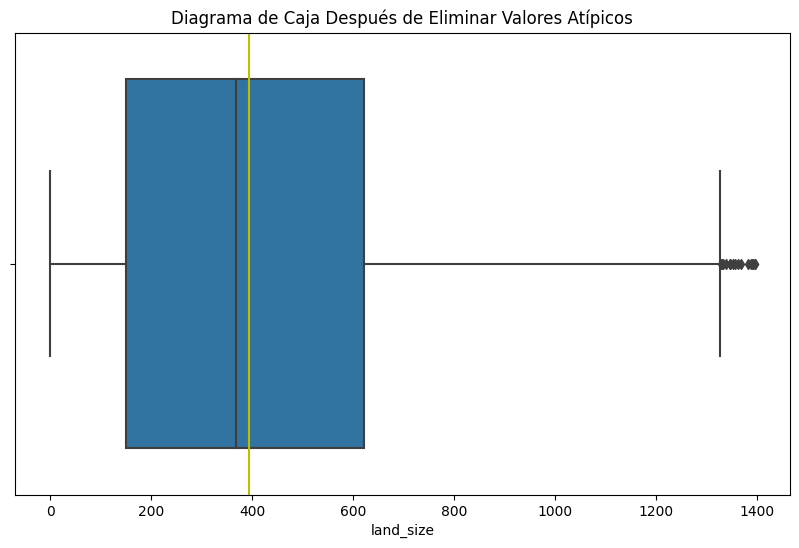

In [5]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['land_size'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['land_size'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Calcular los límites inferior y superior para eliminar valores atípicos (outliers)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar valores atípicos
df_no_outliers = df[
    (df['land_size'] >= lower_bound) &
    (df['land_size'] <= upper_bound)
]

# Calcular estadísticas antes y después de eliminar valores atípicos
stats_before = df['land_size'].describe()
stats_after = df_no_outliers['land_size'].describe()

# Imprimir las estadísticas antes y después
print("Estadísticas Antes de Eliminar Valores Atípicos:\n", stats_before)
print("\nEstadísticas Después de Eliminar Valores Atípicos:\n", stats_after)

# Crear un diagrama de caja (boxplot) después de eliminar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['land_size'])
plt.title("Diagrama de Caja Después de Eliminar Valores Atípicos")
plt.axvline(df_no_outliers['land_size'].mean(), c='y')  # Línea vertical en la media
plt.show()

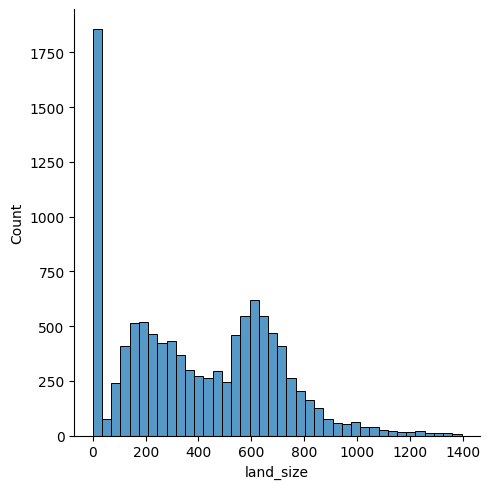

In [6]:
# Crear un histograma de la columna 'land_size' del DataFrame 'df_no_outliers'
sns.displot(df_no_outliers['land_size'], bins=40)

In [7]:
# Filtrar el DataFrame 'df_no_outliers' para eliminar filas con valores de 'land_size' iguales a cero
df_no_outliers = df_no_outliers[df_no_outliers['land_size'] != 0]

In [8]:
# Extraer la columna 'land_size' del DataFrame 'df_no_outliers'
land_size = df_no_outliers['land_size']

# Calcular el rango de la columna 'land_size' (diferencia entre el valor máximo y mínimo)
rango_land_size = land_size.max() - land_size.min()

In [9]:
# Dividir los valores de la columna 'land_size' en 40 segmentos
segmentos = pd.cut(land_size, 40)

In [10]:
# Contar la cantidad de valores en cada segmento de la columna 'land_size'
df_no_outliers['land_size'].groupby(segmentos).count()

land_size
(-0.395, 35.875]        15
(35.875, 70.75]         81
(70.75, 105.625]       243
(105.625, 140.5]       416
(140.5, 175.375]       506
(175.375, 210.25]      530
(210.25, 245.125]      455
(245.125, 280.0]       427
(280.0, 314.875]       416
(314.875, 349.75]      378
(349.75, 384.625]      299
(384.625, 419.5]       264
(419.5, 454.375]       264
(454.375, 489.25]      297
(489.25, 524.125]      240
(524.125, 559.0]       472
(559.0, 593.875]       532
(593.875, 628.75]      617
(628.75, 663.625]      545
(663.625, 698.5]       475
(698.5, 733.375]       414
(733.375, 768.25]      260
(768.25, 803.125]      205
(803.125, 838.0]       155
(838.0, 872.875]       120
(872.875, 907.75]       77
(907.75, 942.625]       58
(942.625, 977.5]        54
(977.5, 1012.375]       60
(1012.375, 1047.25]     40
(1047.25, 1082.125]     41
(1082.125, 1117.0]      26
(1117.0, 1151.875]      21
(1151.875, 1186.75]     16
(1186.75, 1221.625]     15
(1221.625, 1256.5]      19
(1256.5, 1291.375]

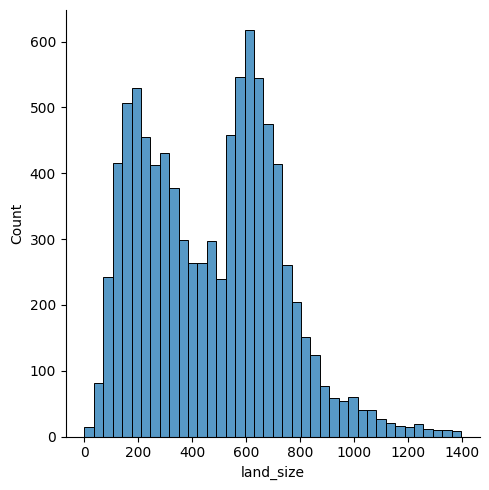

In [11]:
# Crear un histograma de la columna 'land_size' en el DataFrame 'df_no_outliers'
sns.displot(df_no_outliers['land_size'], bins=40)